### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [107]:
data = pd.read_csv('data/coupons.csv')

In [109]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [111]:
#Get count of missing values for each column
missing_values = data.isnull().sum()
nan_counts = data.isna().sum()

print(f"Columns with missing values:{missing_values}")
print('-----')
print(f"Columns with NaN values:{nan_counts}")



Columns with missing values:destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
-----
Columns with NaN values:destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0

3. Decide what to do about your missing data -- drop, replace, other...

In [113]:
# Replace all null values with "Data Unavailable", idea is to preserve as much data as possible. Data can be removed a little later as we move forward with the analysis.
data = data.fillna("Data Unavailable")

#Get count of missing values for each column
missing_values = data.isnull().sum()
nan_counts = data.isna().sum()

print(f"Columns with missing values:{missing_values}")
print('-----')
print(f"Columns with NaN values:{nan_counts}")

Columns with missing values:destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64
-----
Columns with NaN values:destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus      

In [115]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,Data Unavailable,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,Data Unavailable,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,Data Unavailable,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,Data Unavailable,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,Data Unavailable,4~8,1~3,1,1,0,0,1,0


4. What proportion of the total observations chose to accept the coupon?



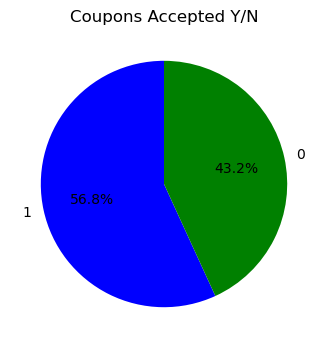

In [121]:
#Best way to figure that out is to create a pie chart. We can create the pie using the "Y" column assuming 1 is yes and 0 is No

# Count values in 'Y' column, to know how many are 1 and how many are 0
y_counts = data['Y'].value_counts()

# Create pie chart
plt.figure(figsize=(4, 4))  # Set figure size
plt.pie(y_counts.values, 
        labels=y_counts.index,
        autopct='%1.1f%%',  # Show percentages
        colors=['blue', 'green'],  
        startangle=90)

# Add title
plt.title('Coupons Accepted Y/N')


# Show the plot
plt.show()

5. Use a bar plot to visualize the `coupon` column.

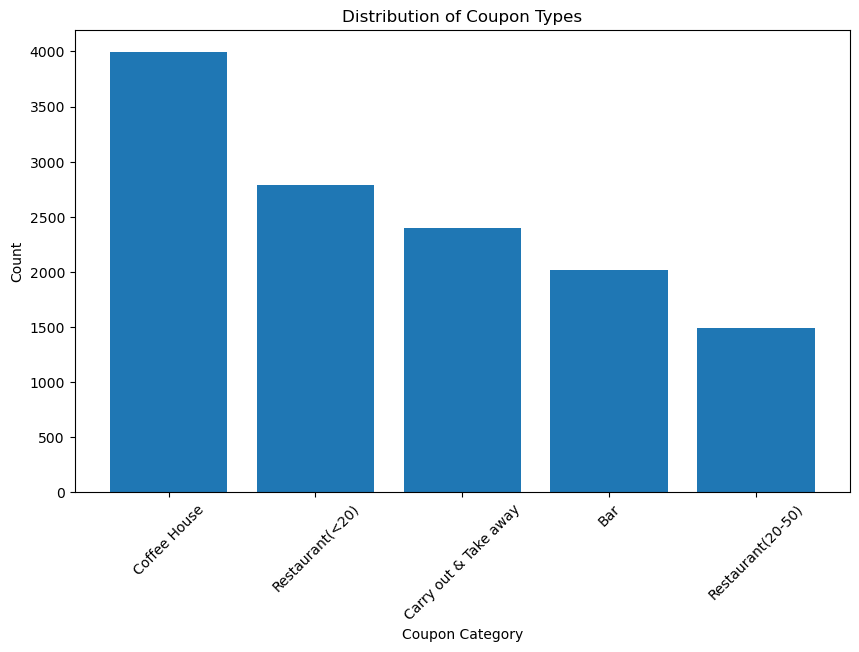

In [123]:
# Count values in 'coupon' column
coupon_counts = data['coupon'].value_counts()

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(coupon_counts.index, coupon_counts.values)

plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

6. Use a histogram to visualize the temperature column.

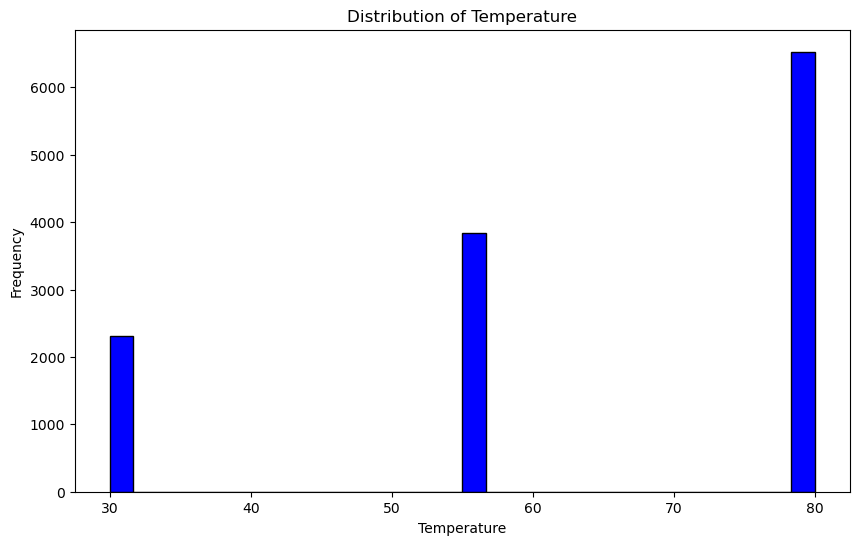

In [125]:
# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(data['temperature'], bins=30, color='blue', edgecolor='black')

plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')

plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [127]:
bar_coupons_df = data[data['coupon']=='Bar']
bar_coupons_df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,Data Unavailable,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,Data Unavailable,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,Data Unavailable,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


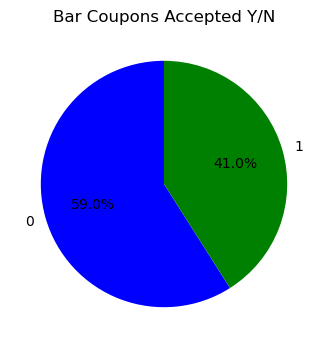

In [129]:
#Create a pie chart again as we did above. We can create the pie using the "Y" column assuming 1 is yes and 0 is No

# Count values in 'Y' column, to know how many are 1 and how many are 0
y_counts = bar_coupons_df['Y'].value_counts()

# Create pie chart
plt.figure(figsize=(4, 4))  # Set figure size
plt.pie(y_counts.values, 
        labels=y_counts.index,
        autopct='%1.1f%%',  # Show percentages
        colors=['blue', 'green'],  
        startangle=90)

plt.title('Bar Coupons Accepted Y/N')
plt.show()

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


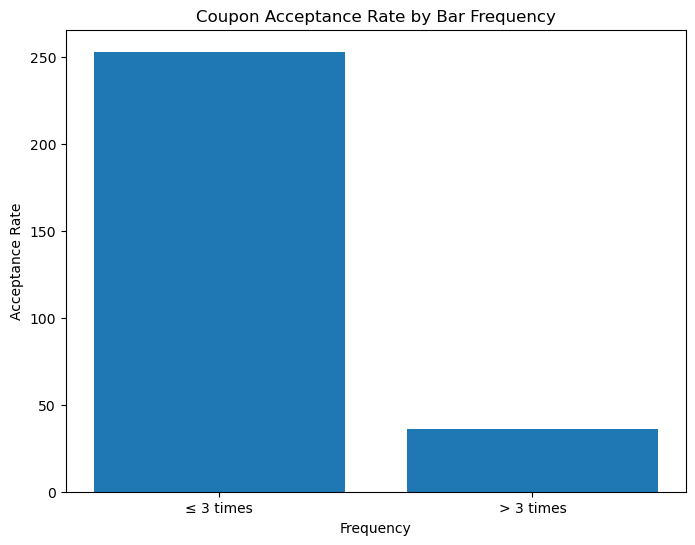

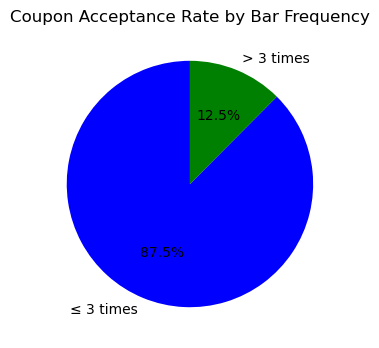

In [131]:
# based on the frequency create two variables to store the info. One for 3 visits or less and one for more frequency of visit
less_3_freq = bar_coupons_df[(bar_coupons_df['Y'] == 1) & (bar_coupons_df['Bar'].isin(['less1', '1-3']))].shape[0]             
more_3_freq = bar_coupons_df[(bar_coupons_df['Y'] == 1) & (bar_coupons_df['Bar'].isin(['4-8', 'gt8']))].shape[0]   

# Create bar plot to compare
plt.figure(figsize=(8, 6))
plt.bar(['≤ 3 times', '> 3 times'], [less_3_freq, more_3_freq])

plt.title('Coupon Acceptance Rate by Bar Frequency')
plt.xlabel('Frequency')
plt.ylabel('Acceptance Rate')

plt.show()

plt.figure(figsize=(4, 4))  
plt.pie([less_3_freq,more_3_freq ], 
        labels=['≤ 3 times', '> 3 times'], 
        autopct='%1.1f%%', 
        colors=['blue', 'green'],  
        startangle=90)
plt.title('Coupon Acceptance Rate by Bar Frequency')
plt.show()


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


C:\Users\kauch\AppData\Local\Temp\ipykernel_6828\2776920656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_df['age'] = bar_coupons_df['age'].replace('50plus', '50')
C:\Users\kauch\AppData\Local\Temp\ipykernel_6828\2776920656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_coupons_df['age'] = bar_coupons_df['age'].replace('below21', '20')
C:\Users\kauch\AppData\Local\Temp\ipykernel_6828\2776920656.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

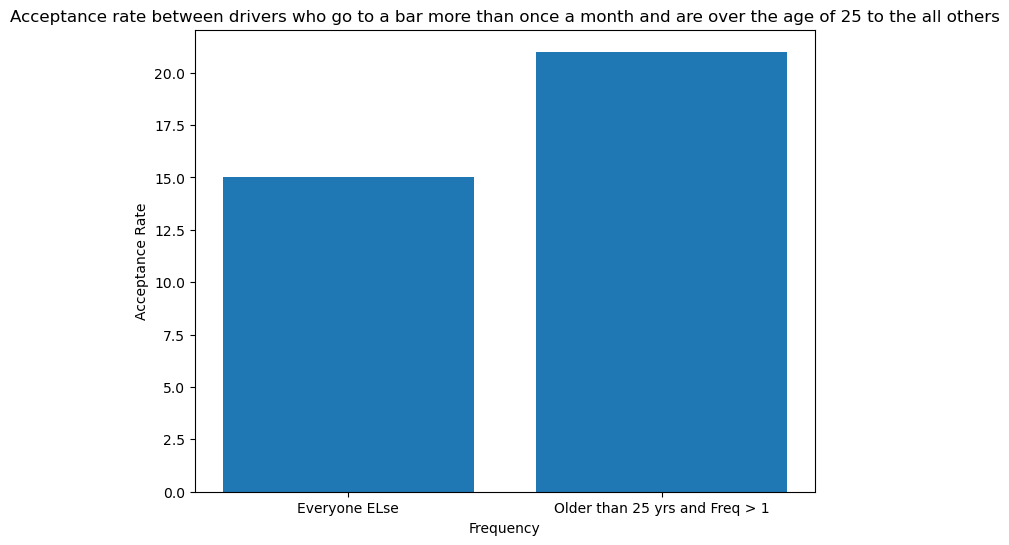


25 year olds who accept and go to the bar more than once are more likely to go to the bar as compared to everone else.



In [137]:
# Convert the age column to numeric vaue, anythign that is 50plus is set to 51 and anything less than 21 is set to 20 for simplicity
bar_coupons_df['age'] = bar_coupons_df['age'].replace('50plus', '50')
bar_coupons_df['age'] = bar_coupons_df['age'].replace('below21', '20') 
bar_coupons_df['age'] = pd.to_numeric(bar_coupons_df['age'])


#get the total where there was coupon acceptance and people go to the bar more than once.
more_than_once_acpt = bar_coupons_df[(bar_coupons_df['Y'] == 1) & (bar_coupons_df['Bar'].isin(['1-3', 'gt8', '4-8']))]
total_acpt = more_than_once_acpt.shape[0]

#get count of people going to bar who are over 25 yrs old and freq is more than once.
age_25_above = more_than_once_acpt[(more_than_once_acpt['age'] > 25)].shape[0]
                                                                       
#everyone else
everyone_else  = total_acpt-age_25_above

# Create bar plot to compare
plt.figure(figsize=(8, 6))
plt.bar(['Everyone ELse', 'Older than 25 yrs and Freq > 1'], [everyone_else, age_25_above])

plt.title('Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others')
plt.xlabel('Frequency')
plt.ylabel('Acceptance Rate')

plt.show()

if everyone_else > age_25_above:
 print('\n25 year olds who accept and go to the bar more than once are less likely to go to the bar as compared to everone else.\n')
if age_25_above > everyone_else:
 print('\n25 year olds who accept and go to the bar more than once are more likely to go to the bar as compared to everone else.\n')

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


35 1 36


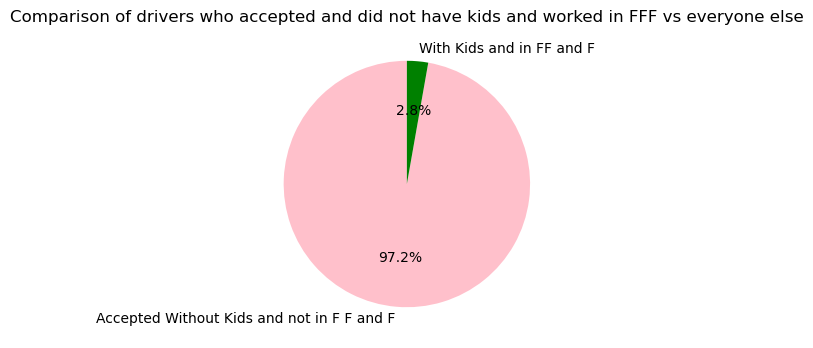

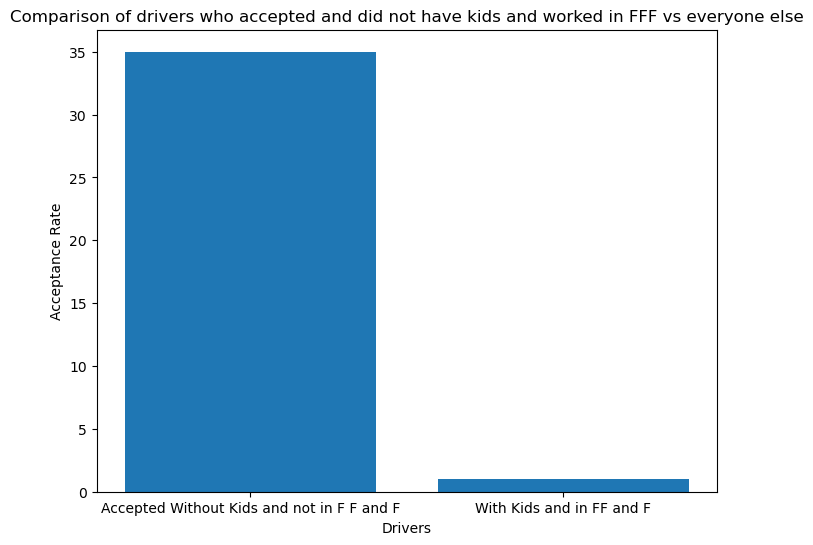

In [211]:
#get total who accepted and go more than once
accepted_all_morefreq = bar_coupons_df[(bar_coupons_df['Y'] == 1)& (bar_coupons_df['Bar'].isin(['1-3', 'gt8', '4-8']))] 
total_accepted_all = accepted_all_morefreq.shape[0]

#get the total where there was coupon acceptance and people go to the bar 
#had passengers that had kids and occupation in farmin, fishing or forestery.

more_than_once_with_kfff = bar_coupons_df[(bar_coupons_df['Y'] == 1) & 
                                     (bar_coupons_df['passanger'].isin(['Kid(s)'])) & 
                                     (bar_coupons_df['occupation'].isin(['Farming Fishing & Forestry']))]

more_than_once_with_kfff = more_than_once_with_kfff.shape[0]

#get the count on who accepted and are in occupation other than Fish Farm Forestry and passengers and dont have kids 
all_other_than_kfff = total_accepted_all - more_than_once_with_kfff

print(all_other_than_kfff,more_than_once_with_kfff, total_accepted_all )

plt.figure(figsize=(4, 4)) # Set figure size 
plt.pie([all_other_than_kfff,more_than_once_with_kfff], 
        labels=['Accepted Without Kids and not in F F and F', 'With Kids and in FF and F'], 
        autopct='%1.1f%%', # Show percentages 
        colors=['pink', 'green'],
        startangle=90) 

plt.title('Comparison of drivers who accepted and did not have kids and worked in FFF vs everyone else') 
plt.show()

# Create bar plot to compare
plt.figure(figsize=(8, 6))
plt.bar(['Accepted Without Kids and not in F F and F', 'With Kids and in FF and F'], [all_other_than_kfff,more_than_once_with_kfff])

plt.title('Comparison of drivers who accepted and did not have kids and worked in FFF vs everyone else') 
plt.xlabel('Drivers')
plt.ylabel('Acceptance Rate')

plt.show()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



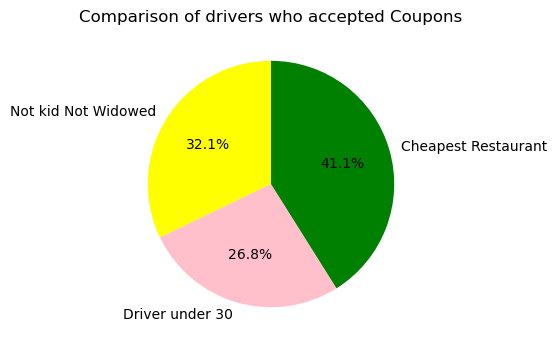

In [235]:
# Question above is confusing, are we comparing the three values to each other or only 1? My assumption is that the
# OR should be AND, which makes more sense. That way we find the three values and compare to each other.

#get total who accepted and went more than once
more_than_once_bar = bar_coupons_df[(bar_coupons_df['Y'] == 1)& (bar_coupons_df['Bar'].isin(['1-3', 'gt8', '4-8']))] 
more_than_once_bar = more_than_once_bar.shape[0]

#go to bars more than once a month, had passengers that were not a kid, and were not widowed
more_nokid_nowid = bar_coupons_df[(bar_coupons_df['Y'] == 1) & 
                                     (bar_coupons_df['passanger'].isin(['Kid(s)'])) & 
                                     (bar_coupons_df['maritalStatus'].isin(['Widowed']))]

more_nokid_nowid = more_nokid_nowid.shape[0]
#from the total who went to bar remove the ones who went more than once, had kids and are widowed, 
#you will get the value of people who went more than once didnt have kids and are not widwoed
more_nokid_nowid = more_than_once_bar - more_nokid_nowid

#go to bars more than once a month and are under the age of 30
more_under_30 = bar_coupons_df[(bar_coupons_df['Y'] == 1) & 
                            (bar_coupons_df['age']<30 )&
                            (bar_coupons_df['Bar'].isin(['1-3', 'gt8', '4-8']))]
more_under_30 = more_under_30.shape[0]

# go to cheap restaurants more than 4 times a month and income is less than 50K
cheap_rest_50k_4ormoretimes = bar_coupons_df[(bar_coupons_df['Y'] == 1) & 
                            (bar_coupons_df['RestaurantLessThan20'].isin(['4-8','gt8'])) &
                            (bar_coupons_df['income'].isin(['$37500 - $49999', '$25000 - $37499','Less than $12500']))]
cheap_rest_50k_4ormoretimes = cheap_rest_50k_4ormoretimes.shape[0]

plt.figure(figsize=(4, 4)) # Set figure size 
plt.pie([more_nokid_nowid, more_under_30,cheap_rest_50k_4ormoretimes], 
        labels=['Not kid Not Widowed','Driver under 30', 'Cheapest Restaurant'], 
        autopct='%1.1f%%', # Show percentages 
        colors=['yellow','pink', 'green'],
        startangle=90) 

plt.title('Comparison of drivers who accepted Coupons') 
plt.show()



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [241]:
print("It seems like providing coupons to drivers is a good idea. Providing coupons makes it an easy decision to pick a restaurant, coffee shop or similar when you have a coupon. It is also interesting to see that drivers who are with kids and are in the farming industry don't have an interest in taking the coupons. There is data missing regarding this information. Are these drivers driving trucks, are they already done with their meal and don't want to be bothered taking a kid (depending on their age) to a restaurant, etc. People with low income tend to consume the coupons and will go for a cheap restaurant. Again some missing information like for example does cheap mean fast food or low quality? People with no kids who are either single or married also tend to consume coupons.")

It seems like providing coupons to drivers is a good idea. Providing coupons makes it an easy decision to pick a restaurant, coffee shop or similar when you have a coupon. It is also interesting to see that drivers who are with kids and are in the farming industry don't have an interest in taking the coupons. There is data missing regarding this information. Are these drivers driving trucks, are they already done with their meal and don't want to be bothered taking a kid (depending on their age) to a restaurant, etc. People with low income tend to consume the coupons and will go for a cheap restaurant. Again some missing information like for example does cheap mean fast food or low quality? People with no kids who are either single or married also tend to consume coupons.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  


Drivers who accept coupons tend to go to the coffee shop more on a sunny day as compared to any other weather type.



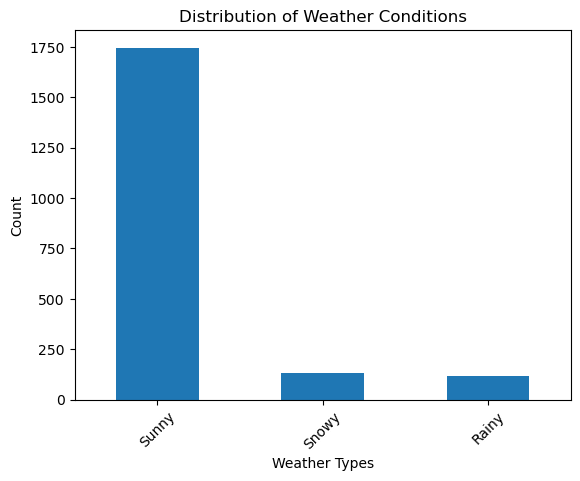

In [91]:
#get coffee house coupon data where drivers accepted the coupons.
ch_coupons_df = data[(data['coupon']=='Coffee House') & (ch_coupons_df['Y'] == 1)]
#ch_coupons_df.head()

#check how many go to coffee house on  sunny day vs other days
weather_unique = ch_coupons_df['weather'].value_counts().plot(kind='bar')

plt.title('Distribution of Weather Conditions')
plt.xlabel('Weather Types')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

print('\nDrivers who accept coupons tend to go to the coffee shop more on a sunny day as compared to any other weather type.\n')


Gender distribution:
gender
Female    1010
Male       985
Name: count, dtype: int64

It seems both genders that accept coupons listed in the data have an almost equal tendency to go to the coffee shop.



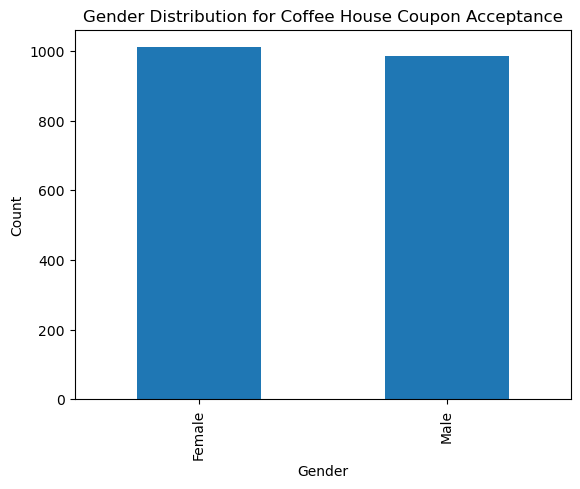

In [93]:
#check how many male vs females go to coffee house

gender_counts = ch_coupons_df['gender'].value_counts()
gender_counts.plot(kind='bar')

plt.title('Gender Distribution for Coffee House Coupon Acceptance')
plt.xlabel('Gender')
plt.ylabel('Count')

# Print the counts
print("Gender distribution:")
print(gender_counts)

print('\nIt seems both genders that accept coupons listed in the data have an almost equal tendency to go to the coffee shop.\n')


It seems drivers that accept coupons either go alone or with friends to a coffee shop



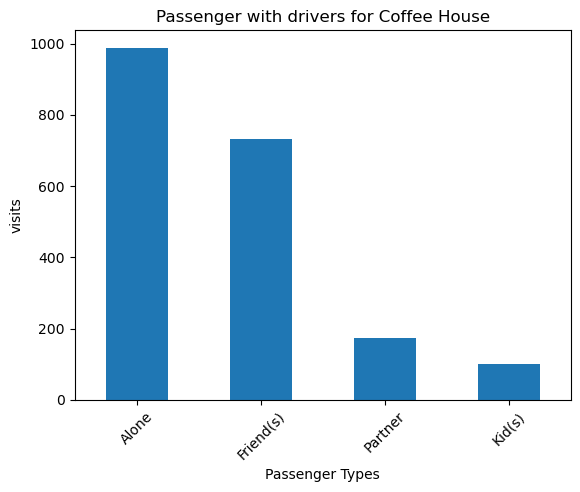

In [139]:
#check how many go with friends vs everone else
passenger_counts = ch_coupons_df['passanger'].value_counts()
passenger_counts.plot(kind='bar')

plt.title('Passenger with drivers for Coffee House')
plt.xlabel('Passenger Types')
plt.ylabel('visits')
plt.xticks(rotation=45)  # Rotate labels for better readability

print('\nIt seems drivers that accept coupons either go alone or with friends to a coffee shop\n')